# Análisis Exploratorio de Datos - Precios de Viviendas


En este proyecto se enfatiza un análisis descriptivo sobre el conjunto de datos de los precios de viviendas, con el fin de obtener una idea de los factores que afectan los precios de las viviendas; con la ayuda de la herramienta Jupyter Notebook y con el lenguaje Python. Además, se construye un modelo de Regresión Lineal con la ayuda de la librería de Scikit-learn para la predicción de los precios de las viviendas.


Dado el conjunto de datos de las viviendas vendidas entre mayo de 2014 y mayo de 2015 del condado de King (Seattle, USA), que dicha fuente de datos se recurrió al repositorio Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction


## Objetivo

* Realizar un análisis descriptivo para verificar la consistencia de los datos, tales como: _valores faltantes, valores atípicos, correlaciones entre variables_, y entre otros que se puedan presentar.


* Desarrollar e implementar un modelo de _Regresión Lineal_ para predecir el precio de las viviendas en función de sus características.


* Y por último realizar una evaluación del “Accuracy” (_precisión_) sobre el modelo construido, apoyándonos con los métodos de _ridge_ y _lasso_ para contraer los coeficientes de regresión.



## Descripción del conjunto de Datos

Dimensiones: 21613 x 21

Formato: csv

Descripción de las columnas:

*	**id:** código

*	**date:** fecha

*	**price:** precio

*	**bedrooms:** nro. de dormitorios

*	**bathrooms:** nro. de baños

*	**sqft_living:** pies cuadrados de la casa

*	**sqft_lot:** pies cuadrados del lote

*	**floors:** nro. de pisos

*	**waterfront:** vista al mar, si (1) o no (0)

*	**view:** buena vista panorámica, si (1) o no (0)

*	**condition:** estado de la vivienda, calificación de 1 a 5

*	**grade:** calificación de usuarios a la vivienda (1 - 13)

*	**sqft_above:** pies cuadrados del piso superior

*	**sqft_basement:** pies cuadrados del sotano

*	**yr_built:** año de construcción

*	**yr_renovated:** año de la renovación de la construcción

*	**zipcode:** código postal

*	**lat:** coordenada de latitud

*	**long:** coordenada de longitud

*	**sqft_living15:** pies cuadrados de la casa, después de 15 años

*	**sqft_lot15:** pies cuadrados del lote, después de 15 años




In [1]:
# importando las librerias necesarias
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

from collections import Counter
import matplotlib.pyplot as plt

import seaborn as sns
#sns.set_style("darkgrid")
sns.set_style('whitegrid')
sns.set_context('talk', font_scale = 0.8)
#sns.set_palette('rainbow')

# permite que aparezcan gráficos dentro del cuaderno
%matplotlib inline

from sklearn.preprocessing import StandardScaler


In [2]:
# importando los datos
dataset = pd.read_csv('./../data/kc_house_data.csv')
dataset.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# mostrando las ultimas 5 filas
dataset.tail()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## 1. EDA

In [4]:
# verificando el tamaño del DataFrame (filas, columnas)
dataset.shape


(21613, 21)

In [5]:
# descripcion de cada columna del conjunto de datos
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# verificando la existencia de valores nulos
dataset.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# descripción estadistica de los datos
dataset.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# eliminando filas duplicadas
dataset.drop_duplicates(subset=None, inplace=True)
dataset.shape


(21613, 21)

In [9]:
# función para obtener una lista de filas duplicadas
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)


In [10]:
# eliminando columnas duplicadas
newDf = dataset.drop(columns=getDuplicateColumns(dataset))
dataset.shape


(21613, 21)

## 1.1. Histogramas

Counter({3: 9824, 4: 6882, 2: 2760, 5: 1601, 6: 272, 1: 199, 7: 38, 0: 13, 8: 13, 9: 6, 10: 3, 11: 1, 33: 1})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


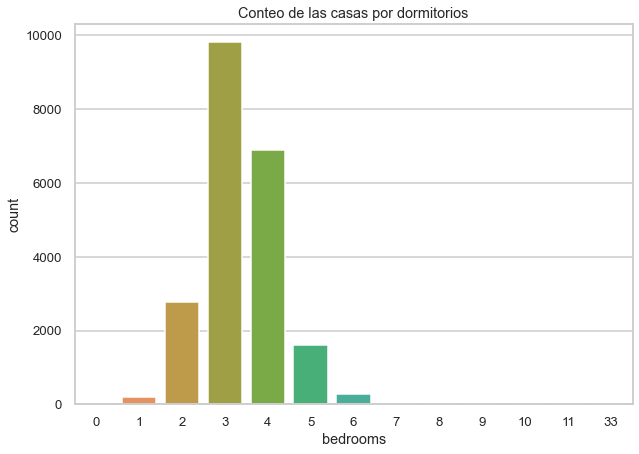

In [11]:

print(Counter(dataset.bedrooms))

plt.figure(figsize=(10,7))
sns.countplot(dataset.bedrooms);
plt.title("Conteo de las casas por dormitorios");


Counter({2.5: 5380, 1.0: 3852, 1.75: 3048, 2.25: 2047, 2.0: 1930, 1.5: 1446, 2.75: 1185, 3.0: 753, 3.5: 731, 3.25: 589, 3.75: 155, 4.0: 136, 4.5: 100, 4.25: 79, 0.75: 72, 4.75: 23, 5.0: 21, 5.25: 13, 0.0: 10, 5.5: 10, 1.25: 9, 6.0: 6, 0.5: 4, 5.75: 4, 6.75: 2, 8.0: 2, 6.25: 2, 6.5: 2, 7.5: 1, 7.75: 1})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


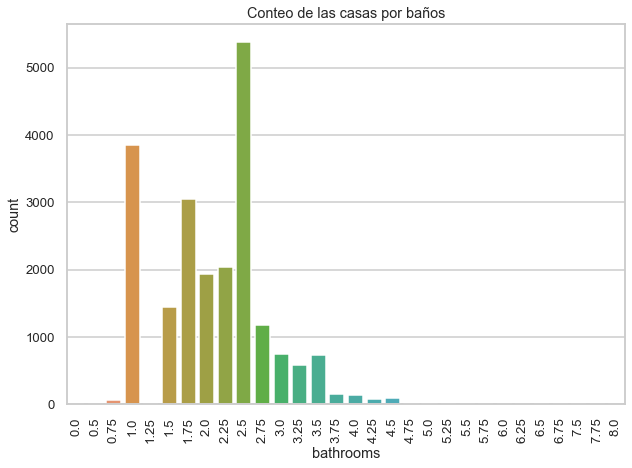

In [12]:

print(Counter(dataset.bathrooms))

plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot(dataset.bathrooms);
plt.title('Conteo de las casas por baños');


Counter({1.0: 10680, 2.0: 8241, 1.5: 1910, 3.0: 613, 2.5: 161, 3.5: 8})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


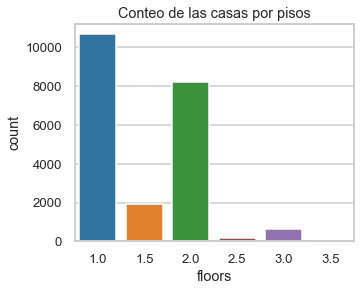

In [13]:

print(Counter(dataset.floors))

plt.figure(figsize=(5,4))
sns.countplot(dataset.floors);
plt.title("Conteo de las casas por pisos");


Counter({0: 19489, 2: 963, 3: 510, 1: 332, 4: 319})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


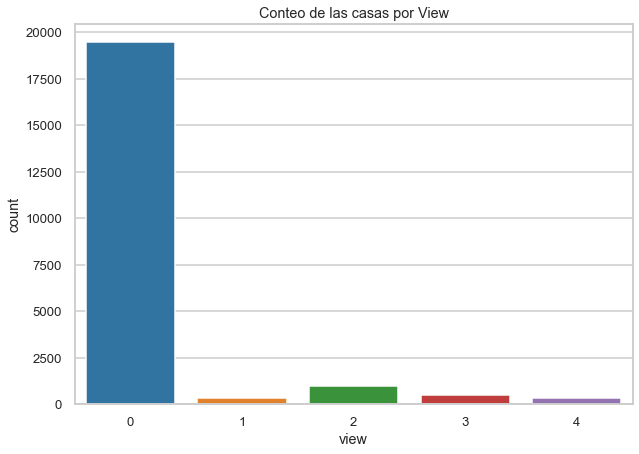

In [14]:

print(Counter(dataset.view))

plt.figure(figsize=(10,7))
sns.countplot(dataset.view);
plt.title("Conteo de las casas por View");


Counter({7: 8981, 8: 6068, 9: 2615, 6: 2038, 10: 1134, 11: 399, 5: 242, 12: 90, 4: 29, 13: 13, 3: 3, 1: 1})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


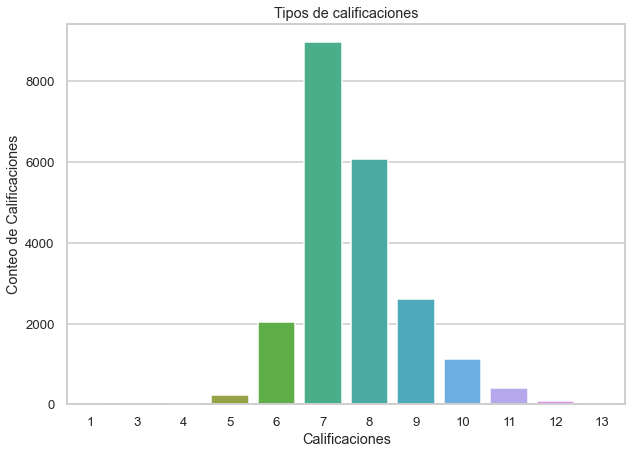

In [15]:

print(Counter(dataset.grade))
plt.figure(figsize=(10,7))

sns.barplot(list(Counter(dataset.grade).keys()),list(Counter(dataset.grade).values()));
plt.xlabel("Calificaciones");
plt.ylabel("Conteo de Calificaciones");
plt.title("Tipos de calificaciones");


In [16]:
dataset.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1.2. Diagramas de cajas 

Counter({3: 9824, 4: 6882, 2: 2760, 5: 1601, 6: 272, 1: 199, 7: 38, 0: 13, 8: 13, 9: 6, 10: 3, 11: 1, 33: 1})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


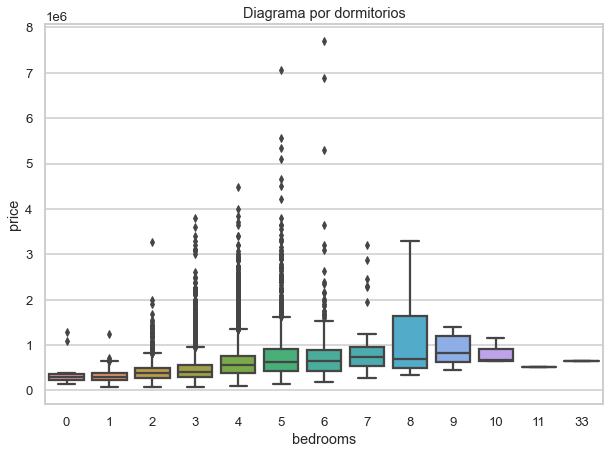

In [17]:

print(Counter(dataset.bedrooms))

plt.figure(figsize=(10,7))
sns.boxplot(dataset.bedrooms, dataset.price)
plt.title("Diagrama por dormitorios");


Counter({2.5: 5380, 1.0: 3852, 1.75: 3048, 2.25: 2047, 2.0: 1930, 1.5: 1446, 2.75: 1185, 3.0: 753, 3.5: 731, 3.25: 589, 3.75: 155, 4.0: 136, 4.5: 100, 4.25: 79, 0.75: 72, 4.75: 23, 5.0: 21, 5.25: 13, 0.0: 10, 5.5: 10, 1.25: 9, 6.0: 6, 0.5: 4, 5.75: 4, 6.75: 2, 8.0: 2, 6.25: 2, 6.5: 2, 7.5: 1, 7.75: 1})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


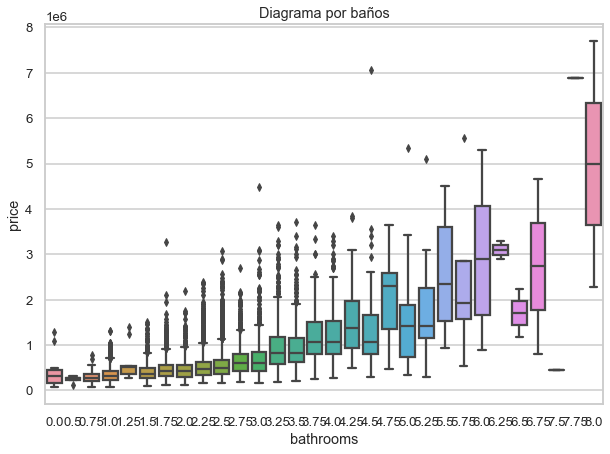

In [18]:

print(Counter(dataset.bathrooms))

plt.figure(figsize=(10,7))
sns.boxplot(dataset.bathrooms, dataset.price)
plt.title("Diagrama por baños");


Counter({1.0: 10680, 2.0: 8241, 1.5: 1910, 3.0: 613, 2.5: 161, 3.5: 8})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


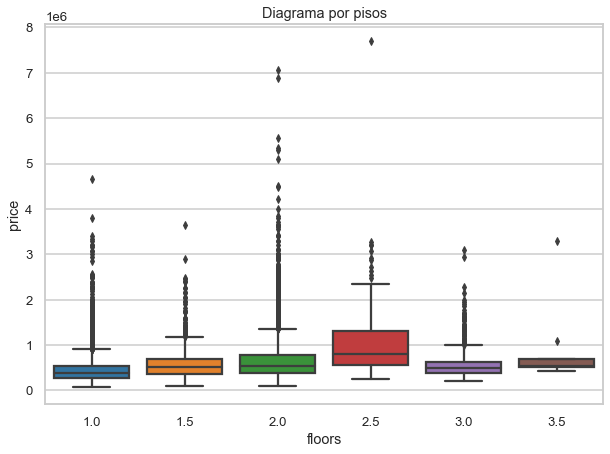

In [19]:

print(Counter(dataset.floors))

plt.figure(figsize=(10,7))
sns.boxplot(dataset.floors, dataset.price)
plt.title("Diagrama por pisos");


Counter({0: 19489, 2: 963, 3: 510, 1: 332, 4: 319})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


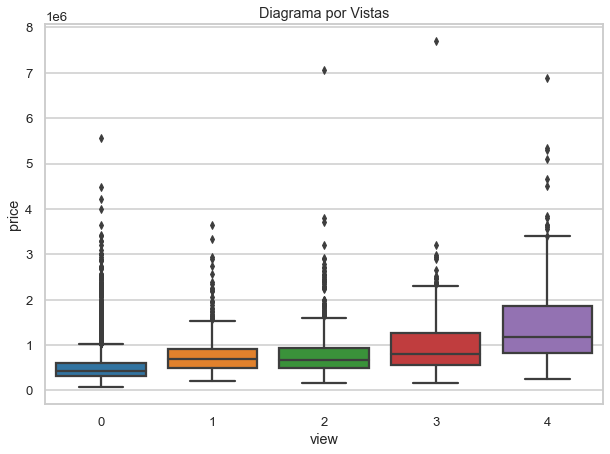

In [20]:

print(Counter(dataset.view))

plt.figure(figsize=(10,7))
sns.boxplot(dataset.view, dataset.price)
plt.title("Diagrama por Vistas");


Counter({7: 8981, 8: 6068, 9: 2615, 6: 2038, 10: 1134, 11: 399, 5: 242, 12: 90, 4: 29, 13: 13, 3: 3, 1: 1})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


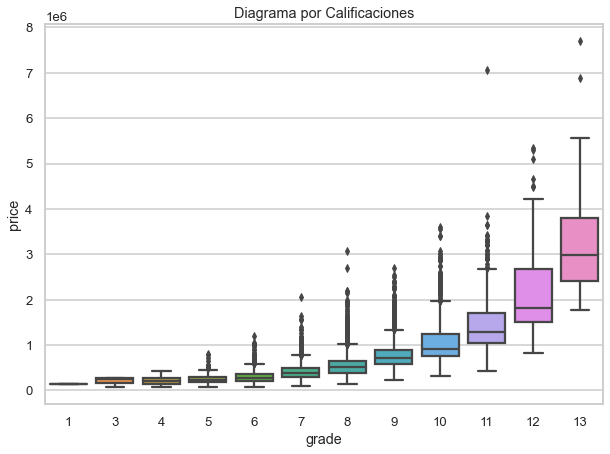

In [21]:

print(Counter(dataset.grade))

plt.figure(figsize=(10,7))
sns.boxplot(dataset.grade, dataset.price)
plt.title("Diagrama por Calificaciones");


## 1.3. Diagrama de dispersión

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


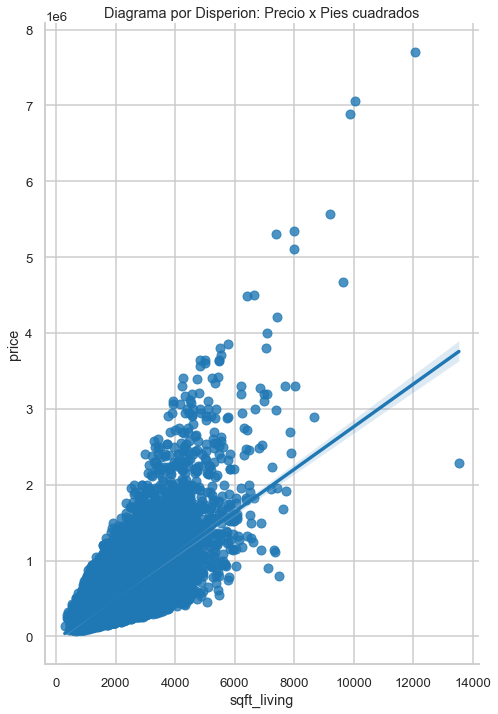

In [22]:

sns.pairplot(dataset, x_vars='sqft_living', y_vars='price', size=10, aspect=0.7, kind='reg')

plt.title("Diagrama por Disperion: Precio x Pies cuadrados");


## 1.4. Preprocesamiento

### Eliminando las columnas no relevantes

In [23]:
columnas = ['id','date']
dataset.drop( columnas, axis=1, inplace=True )


In [24]:
dataset.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Dividiendo el conjunto de Datos

In [25]:
X = list(dataset.iloc[:,1:].values) # variables independientes
y = dataset.price.values # variable dependiente


In [26]:
sn = StandardScaler()
X = sn.fit_transform(X)
X


array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.41794772]])

### Comprobando la distribución de la variable dependiente

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


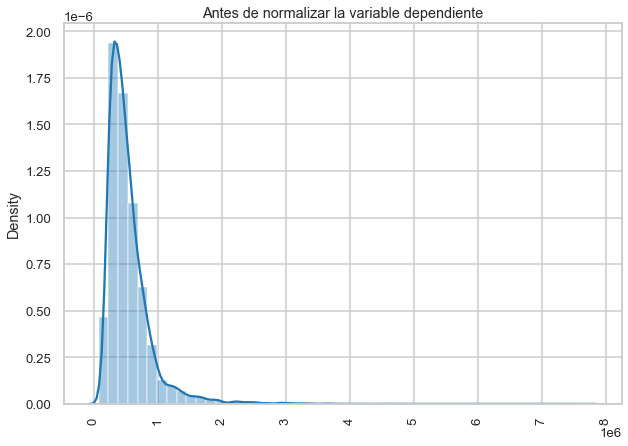

In [27]:
plt.figure(figsize=(10,7))

sns.distplot(y);
plt.xticks( rotation=90 );
plt.title("Antes de normalizar la variable dependiente");


### Vamos a normalizar la variable dependiente

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


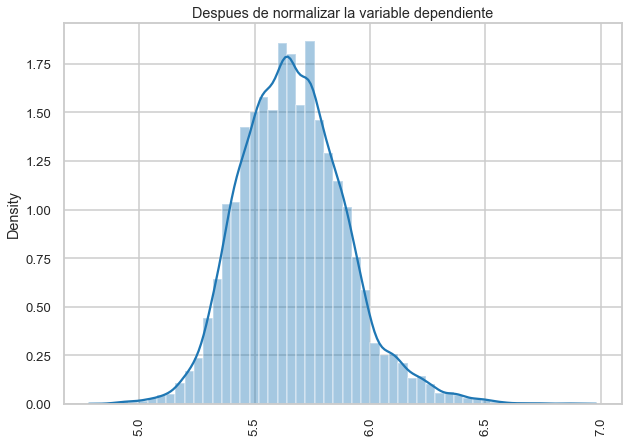

In [28]:
y = np.log10(y)

plt.figure(figsize=(10,7))
sns.distplot(y);
plt.xticks(rotation=90);
plt.title("Despues de normalizar la variable dependiente");


A continuación se realiza la division del dataset en: "train" y "test".

Features: X , las características de las viviendas.

Target: y , precio de la viviendas.

In [29]:
# importando y dividiendo el dataset
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [30]:
# la división predeterminada es 75% para el train y 25% para el test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(17290, 18)
(4323, 18)
(17290,)
(4323,)


## 2. Regresión Lineal

Se utilizará regresión lineal para estimar los valores de los coeficientes.

In [31]:
# importando el modelo
from sklearn.linear_model import LinearRegression

# instanciando el modelo
modelo_lineal = LinearRegression()

# entrenando el modelo para los datos de entrenamiento (aprendendiendo los coeficientes)
modelo_lineal.fit(X_train, y_train)


LinearRegression()

### Realizando el ajuste cuadrático para observar el Accuracy en ambos dataset, tanto en el Train y en el Test. 

In [32]:
y_train_pred = modelo_lineal.predict( X_train )
y_pred = modelo_lineal.predict( X_test )


print("Train score:",r2_score(y_train,y_train_pred))
print("Test score:",r2_score(y_test,y_pred))


Train score: 0.7701374321634965
Test score: 0.7709829211237871


In [33]:
# imprimiendo la intersección y los valores de los coeficientes 
print( modelo_lineal.intercept_ )
print( modelo_lineal.coef_ )


5.667140391016387
[-3.67045556e-03  2.34069996e-02  1.24667673e+11  1.04752049e-02
  1.82024033e-02  1.41415444e-02  1.97060814e-02  1.80949315e-02
  8.01755572e-02 -1.12403722e+11 -6.00744163e+10 -4.32940182e-02
  6.06545611e-03 -1.43139415e-02  8.42632346e-02 -9.69376618e-03
  3.07355916e-02 -5.11502606e-03]



### Prediciendo los precios sobre el conjunto de testeo (X_test)

In [34]:

y_pred = modelo_lineal.predict(X_test)
y_pred


array([5.62401142, 6.30868092, 5.6405138 , ..., 5.59750691, 5.43444386,
       5.6068224 ])

### Cuantificando la precisión de la técnica de predicción comparando con los valores predichos frente a los valores observados

In [35]:
# calculando el MAE usando "scikit-learn"
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))


0.08371726281674839


Se observa que los datos de entrenamiento no llega a diferir mucho con los datos observados.

In [36]:
# calculando el MSE usando "scikit-learn"
print(metrics.mean_squared_error(y_test, y_pred))


0.01155758768584936


De igual manera se observa que se acerca a cero, donde se puede decir que es un buen modelo.


## 2.1. Ridge

Utilizaremos Ridge para contraer los coeficientes de regresión hacia cero, con el denominado "bias - variance" que, lleva a reducir la varianza pero incrementa el bias.

In [37]:

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.77
Test set score: 0.77


## 2.2. Lasso

Haciendo referencia al caso de Ridge Regression, la penalidad de que contrae todos los coeficientes a cero, pero en este caso ningún coeficiente llegará a cero, dado que manejará sólo las variables más relevantes. 

In [38]:

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))


Training set score: 0.77
Test set score: 0.77
Number of features used: 17


## Conclusión

Se pudo observar y analizar el comportamiento de los features al realizar los gráficos, con el fin de clasificar a las mejores variables para luego preparar el modelo respectivo. Además, se tomó en cuenta a los features: sqft_living y price para realizar un diagrama de dispersión.
Y por último, se obtuvo un accuracy del 0.77 con las tecnicas de Ridge y Lasso, dado que se acepta al modelo lineal entrenado.
